# HW3. Exploratory Data Analysis: Pandas
Wikipedia Web Traffic Time Series – https://www.kaggle.com/competitions/web-traffic-time-series-forecasting/data

Необхідно провести аналіз датасету та відповісти на наступні питання:
- Вікіпедії на яких мовах доступні в цьому датасеті?
- Скільки сторінок французькою є на Вікіпедії у датасеті?
- Вивести топ-3 статті для кожної мови за квітень 2016 року.
- Знайти сторінку англійської вікіпедії з найбільшим середнім/медіаною/дисперсією за липень 2016 року.
- Які статті отримали найбільший буст по переглядах за травень 2016 року в абсолютних показниках і відносних. Розглядати сторінки щонайменше з 1000 переглядами.
- Візуалізувати кількість переглядів для топ-5 сторінок англійської Вікіпедії на одному графіку за перше півріччя 2016 року.
- Порівняти розподіли німецьких і французьких сторінок вікіпедії за червень 2016 року.
- Порівняти кількість переглядів для сторінок японської вікіпедії з розбивкою по днях тижня.

In [45]:
import pandas as pd
import numpy as np

In [46]:
file_path = r'C:\Users\De\.kaggle\web-traffic-time-series-forecasting\unarchived\train_1.csv'
train = pd.read_csv(file_path)
train

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18,11,5,13,14,9,9,22,26,...,32,63,15,26,14,20,22,19,18,20
1,2PM_zh.wikipedia.org_all-access_spider,11,14,15,18,11,13,22,11,10,...,17,42,28,15,9,30,52,45,26,20
2,3C_zh.wikipedia.org_all-access_spider,1,0,1,1,0,4,0,3,4,...,3,1,1,7,4,4,6,3,4,17
3,4minute_zh.wikipedia.org_all-access_spider,35,13,10,94,4,26,14,9,11,...,32,10,26,27,16,11,17,19,10,11
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48,9,25,13,3,11,27,13,36,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13,12,13,3,5,10
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145061,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
train.shape

(145063, 551)

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [49]:
pages = train["Page"].str.extract(r'(?P<title>.*)\_(?P<project>[^\.]*\..*)\_(?P<access>.*)\_(?P<agent>.*)')
pages

,title,project,access,agent
0,2NE1,zh.wikipedia.org,all-access,spider
1,2PM,zh.wikipedia.org,all-access,spider
2,3C,zh.wikipedia.org,all-access,spider
3,4minute,zh.wikipedia.org,all-access,spider
4,52_Hz_I_Love_You,zh.wikipedia.org,all-access,spider
...,...,...,...,...
145058,Underworld_(serie_de_películas),es.wikipedia.org,all-access,spider
145059,Resident_Evil:_Capítulo_Final,es.wikipedia.org,all-access,spider
145060,Enamorándome_de_Ramón,es.wikipedia.org,all-access,spider
145061,Hasta_el_último_hombre,es.wikipedia.org,all-access,spider


In [50]:
pages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   title    145063 non-null  object
 1   project  145063 non-null  object
 2   access   145063 non-null  object
 3   agent    145063 non-null  object
dtypes: object(4)
memory usage: 4.4+ MB


In [51]:
pages['project'].value_counts()

project
en.wikipedia.org         24108
ja.wikipedia.org         20431
de.wikipedia.org         18547
fr.wikipedia.org         17802
zh.wikipedia.org         17229
ru.wikipedia.org         15022
es.wikipedia.org         14069
commons.wikimedia.org    10555
www.mediawiki.org         7300
Name: count, dtype: int64

In [52]:
pages = pd.concat([pages, pages['project'].str.extract(r'(?P<subdomain>[^\.]*)\.(?P<domain>.*)')], axis=1)
pages

,title,project,access,agent,subdomain,domain
0,2NE1,zh.wikipedia.org,all-access,spider,zh,wikipedia.org
1,2PM,zh.wikipedia.org,all-access,spider,zh,wikipedia.org
2,3C,zh.wikipedia.org,all-access,spider,zh,wikipedia.org
3,4minute,zh.wikipedia.org,all-access,spider,zh,wikipedia.org
4,52_Hz_I_Love_You,zh.wikipedia.org,all-access,spider,zh,wikipedia.org
...,...,...,...,...,...,...
145058,Underworld_(serie_de_películas),es.wikipedia.org,all-access,spider,es,wikipedia.org
145059,Resident_Evil:_Capítulo_Final,es.wikipedia.org,all-access,spider,es,wikipedia.org
145060,Enamorándome_de_Ramón,es.wikipedia.org,all-access,spider,es,wikipedia.org
145061,Hasta_el_último_hombre,es.wikipedia.org,all-access,spider,es,wikipedia.org


In [53]:
pages['domain'].value_counts()

domain
wikipedia.org    127208
wikimedia.org     10555
mediawiki.org      7300
Name: count, dtype: int64

There're multiple projects in the dataset. We are interested only in wikipedia.org

In [54]:
pages['subdomain'].value_counts()

subdomain
en         24108
ja         20431
de         18547
fr         17802
zh         17229
ru         15022
es         14069
commons    10555
www         7300
Name: count, dtype: int64

In [55]:
pages['access'].value_counts()

access
all-access    74315
mobile-web    35939
desktop       34809
Name: count, dtype: int64

In [56]:
pages['agent'].value_counts()

agent
all-agents    110150
spider         34913
Name: count, dtype: int64

In [57]:
pages_wikipedia = pages[pages['domain'] == 'wikipedia.org'].drop(['project', 'domain'], axis=1).rename(columns={'subdomain': 'language_code'}).copy()
pages_wikipedia

,title,access,agent,language_code
0,2NE1,all-access,spider,zh
1,2PM,all-access,spider,zh
2,3C,all-access,spider,zh
3,4minute,all-access,spider,zh
4,52_Hz_I_Love_You,all-access,spider,zh
...,...,...,...,...
145058,Underworld_(serie_de_películas),all-access,spider,es
145059,Resident_Evil:_Capítulo_Final,all-access,spider,es
145060,Enamorándome_de_Ramón,all-access,spider,es
145061,Hasta_el_último_hombre,all-access,spider,es


Download language codes from https://www.kaggle.com/datasets/ursmaheshj/iso-639-1-language-codes

In [58]:
language_codes = pd.read_csv(r'C:\Users\De\.kaggle\ISO 639 1 Language Codes.csv', index_col='ISO_code')
language_codes

,Language
ISO_code,
aa,Afar
ab,Abkhaz
ae,Avestan
af,Afrikaans
ak,Akan
...,...
yi,Yiddish
yo,Yoruba
za,Zhuang


Merge language codes with pages_wikipedia

In [59]:
pages_wikipedia = pages_wikipedia.merge(language_codes, left_on='language_code', right_index=True)
pages_wikipedia

,title,access,agent,language_code,Language
0,2NE1,all-access,spider,zh,Chinese
1,2PM,all-access,spider,zh,Chinese
2,3C,all-access,spider,zh,Chinese
3,4minute,all-access,spider,zh,Chinese
4,52_Hz_I_Love_You,all-access,spider,zh,Chinese
...,...,...,...,...,...
145058,Underworld_(serie_de_películas),all-access,spider,es,Spanish
145059,Resident_Evil:_Capítulo_Final,all-access,spider,es,Spanish
145060,Enamorándome_de_Ramón,all-access,spider,es,Spanish
145061,Hasta_el_último_hombre,all-access,spider,es,Spanish


# Task 1. Вікіпедії на яких мовах доступні в цьому датасеті?

In [60]:
languages = pages_wikipedia['Language'].value_counts()
print('Number of languages:', len(languages))
languages

Number of languages: 7


Language
English     24108
Japanese    20431
German      18547
French      17802
Chinese     17229
Russian     15022
Spanish     14069
Name: count, dtype: int64

In [61]:
train_wikipedia = pd.concat([pages_wikipedia, train.loc[pages_wikipedia.index].iloc[:, 1:]], axis=1)
train_wikipedia

,title,access,agent,language_code,Language,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1,all-access,spider,zh,Chinese,18,11,5,13,14,...,32,63,15,26,14,20,22,19,18,20
1,2PM,all-access,spider,zh,Chinese,11,14,15,18,11,...,17,42,28,15,9,30,52,45,26,20
2,3C,all-access,spider,zh,Chinese,1,0,1,1,0,...,3,1,1,7,4,4,6,3,4,17
3,4minute,all-access,spider,zh,Chinese,35,13,10,94,4,...,32,10,26,27,16,11,17,19,10,11
4,52_Hz_I_Love_You,all-access,spider,zh,Chinese,NaN,NaN,NaN,NaN,NaN,...,48,9,25,13,3,11,27,13,36,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,Underworld_(serie_de_películas),all-access,spider,es,Spanish,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13,12,13,3,5,10
145059,Resident_Evil:_Capítulo_Final,all-access,spider,es,Spanish,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145060,Enamorándome_de_Ramón,all-access,spider,es,Spanish,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145061,Hasta_el_último_hombre,all-access,spider,es,Spanish,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### We need to group by actual page and sum up data acros agents and access types

In [62]:
page_data = train_wikipedia.drop(['access', 'agent'], axis=1).groupby(['title', 'language_code', 'Language'], as_index=False).sum().copy()
page_data

,title,language_code,Language,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,!vote,en,English,6,8,15,10,8,5,6,...,8,2,14,8,2,2,8,7,3,1
1,"""Awaken,_My_Love!""",en,English,0,0,0,0,0,0,0,...,"7,910","7,762","6,244","6,518","5,895","6,183","6,125","6,348","5,974","5,332"
2,"""European_Society_for_Clinical_Investigation""",en,English,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,3,4
3,"""Heroes""_(David_Bowie_album)",en,English,0,0,0,0,0,0,0,...,"1,240","1,163","1,009",955,"1,252","1,575","1,391","1,655","1,660","1,444"
4,"""Weird_Al""_Yankovic",en,English,"6,513","47,279","5,761","4,589","4,958","5,148","4,800",...,"3,974","3,726","3,245","3,066","3,299","4,537","4,140","5,290","4,109","4,146"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45687,龐茲騙局,zh,Chinese,466,"1,101",658,637,478,530,880,...,461,366,285,349,387,395,402,422,386,199
45688,龔嘉欣,zh,Chinese,617,795,984,856,879,816,807,...,"1,424","1,239","1,523","1,177","1,378","1,150","1,004","1,073",761,"1,248"
45689,龔照勝,zh,Chinese,10,5,4,25,6,5,5,...,18,9,8,7,7,8,6,16,45,12
45690,龙生九子,zh,Chinese,95,86,87,86,81,90,89,...,284,229,304,339,308,324,303,455,555,739


In [63]:
page_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45692 entries, 0 to 45691
Columns: 553 entries, title to 2016-12-31
dtypes: float64(550), object(3)
memory usage: 192.8+ MB


Turns out it's only 45691 pages

Test if grouping worked correctly

In [64]:
train_wikipedia[train_wikipedia['title'] == '!vote']

,title,access,agent,language_code,Language,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
8357,!vote,desktop,all-agents,en,English,3,4,7,4,4,...,3,1,6,3,1,1,3,3,1,0
32275,!vote,all-access,spider,en,English,0,0,1,2,0,...,2,0,2,2,0,0,1,1,1,0
37206,!vote,all-access,all-agents,en,English,3,4,7,4,4,...,3,1,6,3,1,1,4,3,1,1


In [65]:
page_data[page_data['title'] == '!vote']

,title,language_code,Language,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,!vote,en,English,6,8,15,10,8,5,6,...,8,2,14,8,2,2,8,7,3,1


# Task 2. Скільки сторінок французькою є на Вікіпедії у датасеті?

In [66]:
page_data["Language"].value_counts()

Language
English     11048
Japanese     6961
German       6834
French       5852
Chinese      5505
Russian      4794
Spanish      4698
Name: count, dtype: int64

French:       5852

In [67]:
page_data[page_data["Language"] == "French"].sample(10)

,title,language_code,Language,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
17556,Mante_religieuse,fr,French,184,211,217,258,265,293,249,...,104,110,132,149,177,111,154,109,121,132
9181,Eugenie_Bouchard,fr,French,276,201,156,123,83,108,211,...,39,36,37,40,70,54,44,41,83,103
18626,Michel_de_Montaigne,fr,French,"2,132","1,743","1,023",776,839,"1,003",740,...,"1,341","1,449","1,127","1,102","1,602","1,658","1,539","1,701","1,376",949
21283,Personnages_de_Grey's_Anatomy,fr,French,205,201,179,115,140,138,149,...,283,210,157,175,298,324,240,283,368,234
13726,Jessica_Jones_(série_télévisée),fr,French,282,263,289,237,380,386,365,...,"1,167","1,088",964,"1,201","1,513","1,996","1,666","1,661","1,604","1,225"
28333,Very_Bad_Trip,fr,French,568,453,556,553,593,793,562,...,510,399,342,450,484,416,471,585,567,498
10517,Gatsby_le_Magnifique,fr,French,9,23,6,24,17,27,22,...,672,560,547,667,732,731,743,705,780,679
14959,Khalilou_Fadiga,fr,French,31,27,38,28,20,16,14,...,26,20,17,24,45,38,25,38,109,46
8178,Décès_en_octobre_2016,fr,French,0,0,0,0,0,0,0,...,427,482,528,696,"3,883","3,139","2,485","2,302","1,508","1,525"
8160,Décompte_des_médailles_olympiques_par_nation,fr,French,68,80,87,70,83,96,88,...,76,73,59,46,92,75,94,67,66,69


# Task 3. Вивести топ-3 статті для кожної мови за квітень 2016 року.

In [68]:
cols_text = page_data.columns[:3]

def get_text_cols(data):    
    return page_data.loc[data.index, cols_text]

def get_month_data(data, yyyy_mm):
    cols = data.columns[data.columns.str.startswith(yyyy_mm)]
    # print('Taking cols:', cols)
    return data.loc[:,cols]
    
def get_month_sum_data(data, yyyy_mm):
    res = get_text_cols(data)
    res[yyyy_mm] = get_month_data(data, yyyy_mm).sum(axis=1)
    return res

page_data_2016_04 = get_month_sum_data(page_data, '2016-04')
page_data_2016_04

,title,language_code,Language,2016-04
0,!vote,en,English,345
1,"""Awaken,_My_Love!""",en,English,0
2,"""European_Society_for_Clinical_Investigation""",en,English,45
3,"""Heroes""_(David_Bowie_album)",en,English,"41,995"
4,"""Weird_Al""_Yankovic",en,English,"471,902"
...,...,...,...,...
45687,龐茲騙局,zh,Chinese,"21,822"
45688,龔嘉欣,zh,Chinese,"17,675"
45689,龔照勝,zh,Chinese,"1,026"
45690,龙生九子,zh,Chinese,"3,729"


In [69]:
pd.options.display.float_format = '{:,.0f}'.format
pd.options.display.max_rows = 100

page_data_2016_04.groupby('language_code').apply(lambda x: x.nlargest(3, '2016-04'), include_groups=False).reset_index(drop=True)

,title,Language,2016-04
0,Wikipedia:Hauptseite,German,"176,364,742"
1,Spezial:Suche,German,"24,701,431"
2,Spezial:Weblinksuche,German,"5,843,280"
3,Main_Page,English,"1,032,778,996"
4,Special:Search,English,"134,951,464"
5,Prince_(musician),English,"34,920,000"
6,Wikipedia:Portada,Spanish,"83,789,416"
7,Especial:Buscar,Spanish,"26,366,721"
8,Especial:Entrar,Spanish,"3,761,140"
9,Wikipédia:Accueil_principal,French,"97,318,624"


Переважно сервісні сторінки (головна, пошукова та логін), це не цікаво, давайте приберемо їх

In [70]:
def extract_prefix(data):
    data['title_prefix'] = data['title'].str.extract(r'(?P<title_prefix>[^\:]*)\:.*')
        
d = page_data_2016_04.groupby('language_code').apply(lambda x: x.nlargest(100, '2016-04'), include_groups=False).reset_index(drop=True).copy()
extract_prefix(d)
d[['title_prefix', 'Language']].value_counts()

title_prefix             Language
Spezial                  German      10
Служебная                Russian      9
Spécial                  French       9
Special                  English      9
Especial                 Spanish      7
特別                       Japanese     5
Special                  Chinese      5
Wikipedia                Spanish      2
                         German       2
Special                  German       2
Datei                    German       1
Star_Wars                English      1
Batman_v_Superman        German       1
Первый_мститель          Russian      1
Википедия                Russian      1
Бэтмен_против_Супермена  Russian      1
Wikipédia                French       1
Batman_v_Superman        Spanish      1
Batman_v_Superman_       French       1
Wikipedia                Chinese      1
User                     English      1
The_First_Avenger        German       1
Template                 Japanese     1
Star_Wars                German       1
Captai

In [71]:
special_prefixes = ['Spezial', 'Служебная', 'Spécial', 'Special', 'Especial', '特別', 'Wikipedia', 'Википедия', 'Wikipédia', 'Wikipedia', 'User', 'Template', 'Portal', 'Aide', 'Sp?cial']
special_titles = ['Hauptseite', 'Main_Page', 'Заглавная_страница', 'メインページ']

def drop_special_pages(data):
    extract_prefix(data)
    return data[
        (
            (data['title_prefix'].isna()) | 
            (~data['title_prefix'].isin(special_prefixes))
        ) & 
        (~data['title'].isin(special_titles))
    ].drop(['title_prefix'], axis=1)

drop_special_pages(page_data_2016_04).groupby('language_code').apply(lambda x: x.nlargest(3, '2016-04'), include_groups=False).reset_index(drop=True)

,title,Language,2016-04
0,Prince,German,"2,352,838"
1,Honig_im_Kopf,German,"1,688,039"
2,Nekrolog_2016,German,"1,225,817"
3,Prince_(musician),English,"34,920,000"
4,XHamster,English,"12,441,228"
5,The_Adventures_of_Tintin,English,"8,197,354"
6,Miguel_de_Cervantes,Spanish,"1,891,780"
7,Día_de_la_Tierra,Spanish,"1,775,804"
8,Prince_(músico),Spanish,"1,476,691"
9,Organisme_de_placement_collectif_en_valeurs_mo...,French,"73,131,871"


- Death of Prince in April 2016 made his page one of the most popular articles in English, German, French, Spanish wikipedias
- Earthquake in Japan
- На болотах як завжди, війна та репресії

# Task 4. Знайти сторінку англійської вікіпедії з найбільшим середнім/медіаною/дисперсією за липень 2016 року.

In [72]:
page_data_wo_special = drop_special_pages(page_data)
page_data_en = page_data_wo_special[page_data_wo_special['language_code'] == 'en']

data_en_2016_07 = get_month_data(page_data_en, '2016-07')
data_en_2016_07['mean'] = data_en_2016_07.mean(axis=1)
data_en_2016_07['median'] = data_en_2016_07.median(axis=1)
data_en_2016_07['std'] = data_en_2016_07.std(axis=1)

page_data_en_2016_07_stats = pd.concat((get_text_cols(page_data_en), data_en_2016_07[['mean', 'median', 'std']]), axis=1).copy()

# Smaller deviation is better
page_data_en_2016_07_stats.sort_values(['mean', 'median', 'std'], ascending=[False, False, True]).head(1)

,title,language_code,Language,mean,median,std
21697,Pokémon_Go,en,English,"596,575","476,250","500,811"


Pokémon_Go, I remember that summer

# Task 5. Які статті отримали найбільший буст по переглядах за травень 2016 року в абсолютних показниках і відносних. Розглядати сторінки щонайменше з 1000 переглядами.

In [73]:
# Let's calculate the boost as the difference between the number of views in May and the average number of views in April

may_stats = get_month_sum_data(page_data_wo_special, '2016-04')
may_stats['2016-05'] = get_month_data(page_data_wo_special, '2016-05').sum(axis=1)

may_stats = may_stats[(may_stats['2016-04'] >= 1000) & (may_stats['2016-05'] >= 1000)].copy()
may_stats['boost_abs'] = may_stats['2016-05'] - may_stats['2016-04']
may_stats['boost_percent'] = 100*may_stats['2016-05']/may_stats['2016-04'] - 100

n = 10

## в абсолютних показниках

In [74]:
may_stats.nlargest(n, 'boost_abs')

,title,language_code,Language,2016-04,2016-05,boost_abs,boost_percent
5066,Captain_America:_Civil_War,en,English,"5,936,052","16,152,261","10,216,209",172
3333,Azúcar_Moreno,en,English,"3,862","9,578,396","9,574,534","247,916"
29341,X-Men:_Apocalypse,en,English,"1,309,310","7,640,228","6,330,918",484
5929,Cinco_de_Mayo,en,English,"549,060","4,669,792","4,120,732",751
31201,Евровидение_2016,ru,Russian,"482,451","4,509,171","4,026,720",835
41258,水谷優子,ja,Japanese,"29,715","3,443,601","3,413,886","11,489"
9229,Eurovision_Song_Contest_2016,en,English,"857,865","3,848,603","2,990,738",349
32598,"Олдмен,_Гэри",ru,Russian,"61,538","2,978,985","2,917,447","4,741"
43486,舛添要一,ja,Japanese,"281,983","3,082,509","2,800,526",993
12124,Historia_de_Morelia,es,Spanish,"1,161","2,723,897","2,722,736","234,516"


## і відносних

In [75]:
may_stats.nlargest(n, 'boost_percent')

,title,language_code,Language,2016-04,2016-05,boost_abs,boost_percent
3333,Azúcar_Moreno,en,English,"3,862","9,578,396","9,574,534","247,916"
12124,Historia_de_Morelia,es,Spanish,"1,161","2,723,897","2,722,736","234,516"
4431,Bosseborn,de,German,"1,305","738,301","736,996","56,475"
35919,ポラロイド,ja,Japanese,"3,933","2,005,627","2,001,694","50,895"
7086,Datei:Schwarzachklamm_44.jpg,de,German,"1,432","711,016","709,584","49,552"
25469,Star_of_the_South,en,English,"2,029","693,079","691,050","34,059"
7769,Disappearance_of_Bobby_Dunbar,en,English,"4,831","1,437,210","1,432,379","29,650"
31040,"Джекобс,_Джейн",ru,Russian,"1,169","344,957","343,788","29,409"
29579,Yuri_Kochiyama,en,English,"7,477","2,112,676","2,105,199","28,156"
25475,Startup_Disk_Creator,en,English,"3,442","965,253","961,811","27,943"


# Task 6. Візуалізувати кількість переглядів для топ-5 сторінок англійської Вікіпедії на одному графіку за перше півріччя 2016 року.

In [76]:
cols_2016_h1 = page_data_en.columns
cols_2016_h1 = cols_2016_h1[(cols_2016_h1 >= '2016-01-01') & (cols_2016_h1 <= '2016-06-30')]
print(cols_2016_h1)

    
n = 5
page_data_en_2016_h1 = page_data_en.loc[:, cols_2016_h1.insert(0, 'title')].copy()
page_data_en_2016_h1['sum'] = page_data_en_2016_h1[cols_2016_h1].sum(axis=1)
page_data_en_2016_h1_top_n = page_data_en_2016_h1.nlargest(n, 'sum')
page_data_en_2016_h1_top_n

Index(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04', '2016-01-05',
       '2016-01-06', '2016-01-07', '2016-01-08', '2016-01-09', '2016-01-10',
       ...
       '2016-06-21', '2016-06-22', '2016-06-23', '2016-06-24', '2016-06-25',
       '2016-06-26', '2016-06-27', '2016-06-28', '2016-06-29', '2016-06-30'],
      dtype='object', length=182)


,title,2016-01-01,2016-01-02,2016-01-03,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-09,...,2016-06-22,2016-06-23,2016-06-24,2016-06-25,2016-06-26,2016-06-27,2016-06-28,2016-06-29,2016-06-30,sum
28832,Web_scraping,"229,397","494,612","255,198","13,113","88,537","331,065","608,185","183,728","188,310",...,"2,157","2,263","1,701","1,075","1,240","1,807","1,978","1,962","1,924","82,561,763"
7944,Donald_Trump,"101,531","101,573","121,300","106,103","118,711","130,573","150,421","120,265","107,769",...,"158,172","155,781","185,146","151,142","140,136","129,443","136,509","125,728","123,450","81,322,689"
29369,XHamster,"5,971","5,964","5,709","6,625","5,388","4,998","5,144","287,387","440,727",...,"396,742","384,882","382,400","408,746","433,887","408,482","393,821","390,137","392,513","73,876,901"
21973,Prince_(musician),"41,625","38,729","17,071","14,737","15,408","14,285","15,416","17,266","18,160",...,"31,667","27,759","22,804","25,618","29,661","64,485","34,072","26,586","23,534","41,789,262"
7241,Deaths_in_2016,"158,843","145,954","142,161","161,851","162,111","155,590","171,229","162,348","143,150",...,"185,551","188,574","174,775","157,419","164,124","195,956","209,799","198,485","186,728","35,489,656"


In [77]:
top_n_transposed = page_data_en_2016_h1_top_n.drop(columns=['sum']).set_index('title').T
top_n_transposed.index.name = 'date'
top_n_transposed

title,Web_scraping,Donald_Trump,XHamster,Prince_(musician),Deaths_in_2016
date,,,,,
2016-01-01,"229,397","101,531","5,971","41,625","158,843"
2016-01-02,"494,612","101,573","5,964","38,729","145,954"
2016-01-03,"255,198","121,300","5,709","17,071","142,161"
2016-01-04,"13,113","106,103","6,625","14,737","161,851"
2016-01-05,"88,537","118,711","5,388","15,408","162,111"
...,...,...,...,...,...
2016-06-26,"1,240","140,136","433,887","29,661","164,124"
2016-06-27,"1,807","129,443","408,482","64,485","195,956"
2016-06-28,"1,978","136,509","393,821","34,072","209,799"


In [78]:
import plotly.express as px

fig = px.line(
    top_n_transposed, 
    y=top_n_transposed.columns, 
    title='Кількість переглядів для топ-5 сторінок англійської Вікіпедії',
)
fig.update_layout(
    width=1600,
    height=600,
    xaxis_title='Date',
    yaxis_title='Views',
    hovermode='x unified'
)
fig.show()


### Let's use logarithmic scale for better visualization

In [79]:
fig = px.line(
    top_n_transposed, 
    y=top_n_transposed.columns, 
    title='Кількість переглядів для топ-5 сторінок англійської Вікіпедії',
    log_y=True
)
fig.update_layout(
    width=1600,
    height=600,
    xaxis_title='Date',
    yaxis_title='Views',
    hovermode='x unified'
)
fig.show()

XHamster and Deaths_in_2016 have very stable view count, could be data collection robots or bots

# Task 7. Порівняти розподіли німецьких і французьких сторінок вікіпедії за червень 2016 року.

In [80]:
page_data_2016_06_fr = get_month_sum_data(page_data_wo_special[page_data_wo_special['language_code'] == 'fr'], '2016-06')
page_data_2016_06_de = get_month_sum_data(page_data_wo_special[page_data_wo_special['language_code'] == 'de'], '2016-06')

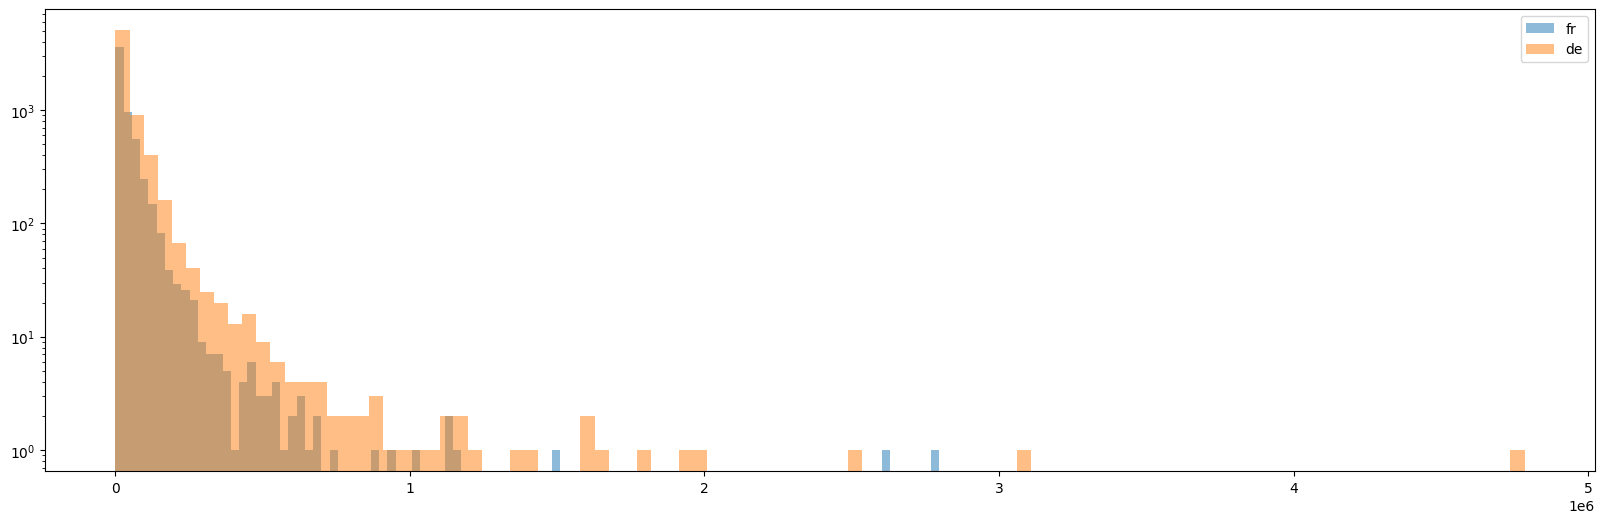

In [81]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

plt.figure(figsize=(20, 6))
plt.hist(page_data_2016_06_fr['2016-06'], bins=100, alpha=0.5, label='fr')
plt.hist(page_data_2016_06_de['2016-06'], bins=100, alpha=0.5, label='de')
plt.yscale('log')
plt.legend()
plt.show()

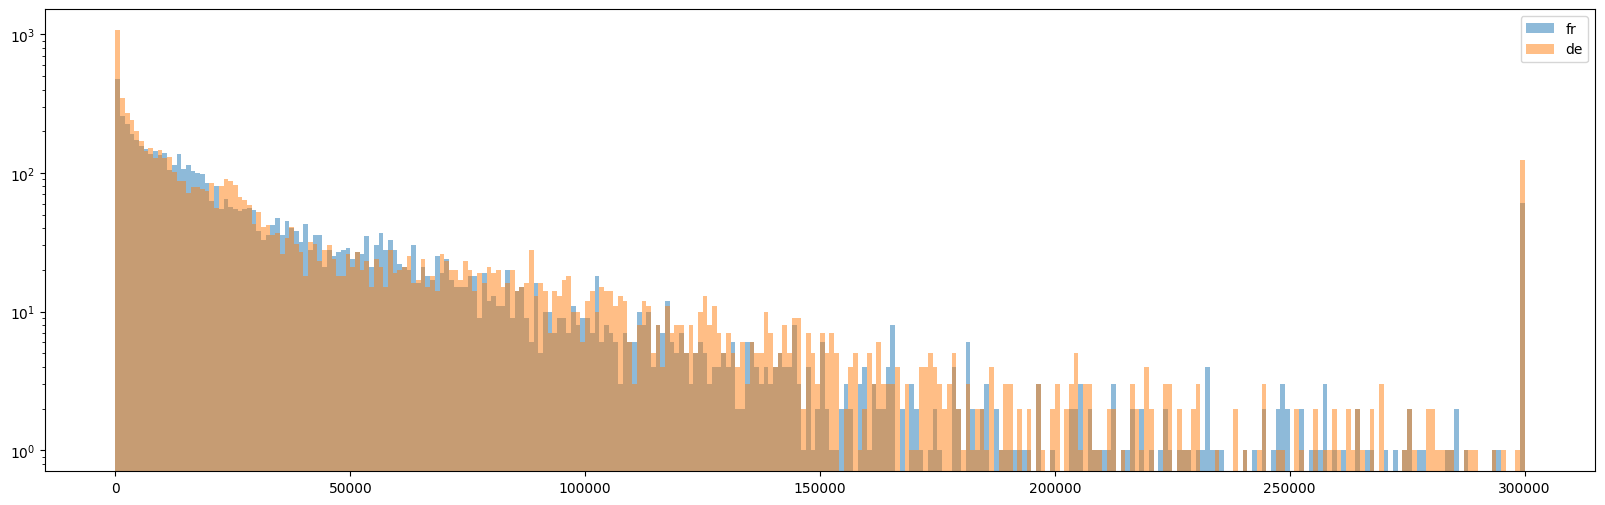

In [82]:
clip_value = 300000
page_data_2016_06_fr['2016-06_limited'] = page_data_2016_06_fr['2016-06'].clip(upper=clip_value)
page_data_2016_06_de['2016-06_limited'] = page_data_2016_06_de['2016-06'].clip(upper=clip_value)

plt.figure(figsize=(20, 6))
plt.hist(page_data_2016_06_fr['2016-06_limited'], bins=300, alpha=0.5, label='fr')
plt.hist(page_data_2016_06_de['2016-06_limited'], bins=300, alpha=0.5, label='de')
plt.yscale('log')
plt.legend()
plt.show()

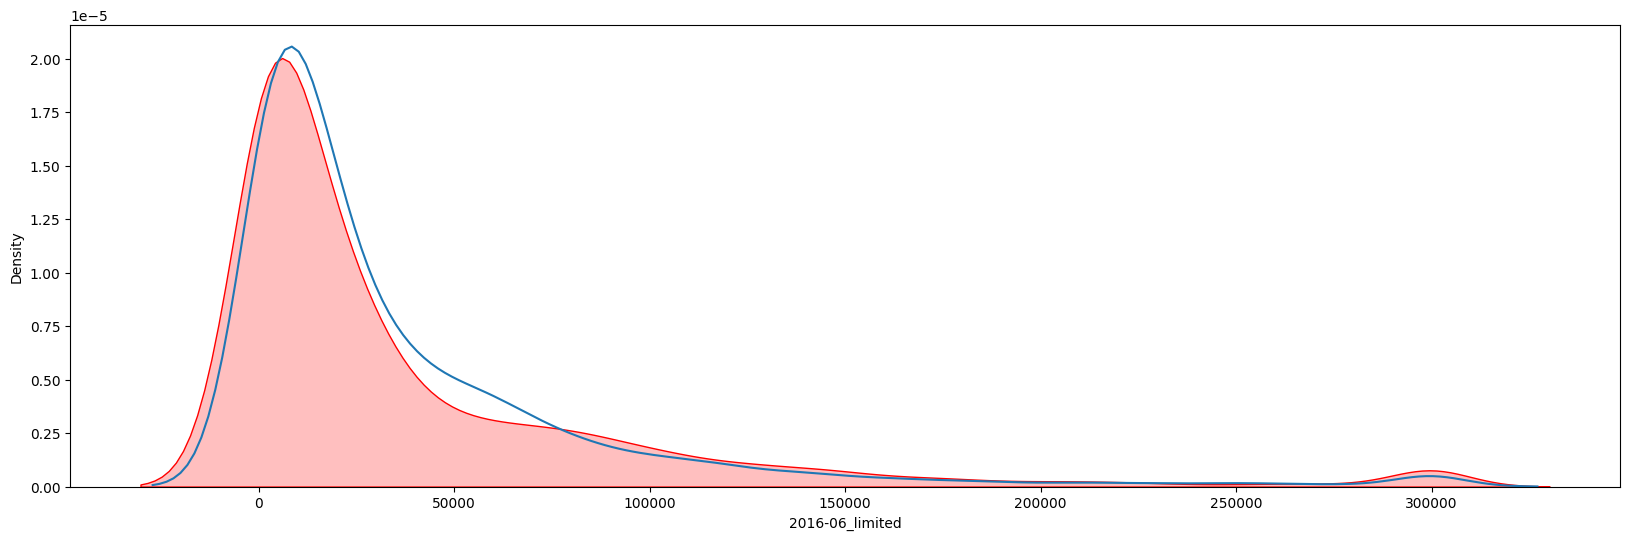

In [83]:
plt.figure(figsize=(20, 6))

sns.kdeplot(page_data_2016_06_fr['2016-06_limited'], label='fr')
sns.kdeplot(page_data_2016_06_de['2016-06_limited'], label='de', fill=True, color="r")

plt.show()

# Task 8. Порівняти кількість переглядів для сторінок японської вікіпедії з розбивкою по днях тижня.

In [84]:
page_data_ja = page_data_wo_special[page_data_wo_special['language_code'] == 'ja']
page_data_ja_melted = page_data_ja.drop(columns=['title', 'language_code', 'Language']).melt(var_name='date', value_name='views')

# string to date
page_data_ja_melted['date'] = pd.to_datetime(page_data_ja_melted['date'])
page_data_ja_melted['day_of_week_n'] = page_data_ja_melted['date'].dt.dayofweek + 1
page_data_ja_melted['day_of_week'] = page_data_ja_melted['date'].dt.day_name()

# group by day of week
page_data_ja_by_day_of_week = page_data_ja_melted.groupby(['day_of_week_n', 'day_of_week'])['views'].sum().reset_index().sort_values('day_of_week_n')
page_data_ja_by_day_of_week

,day_of_week_n,day_of_week,views
0,1,Monday,"1,124,070,745"
1,2,Tuesday,"1,066,214,321"
2,3,Wednesday,"1,062,718,809"
3,4,Thursday,"1,065,479,734"
4,5,Friday,"1,118,127,572"
5,6,Saturday,"1,177,428,870"
6,7,Sunday,"1,246,600,049"


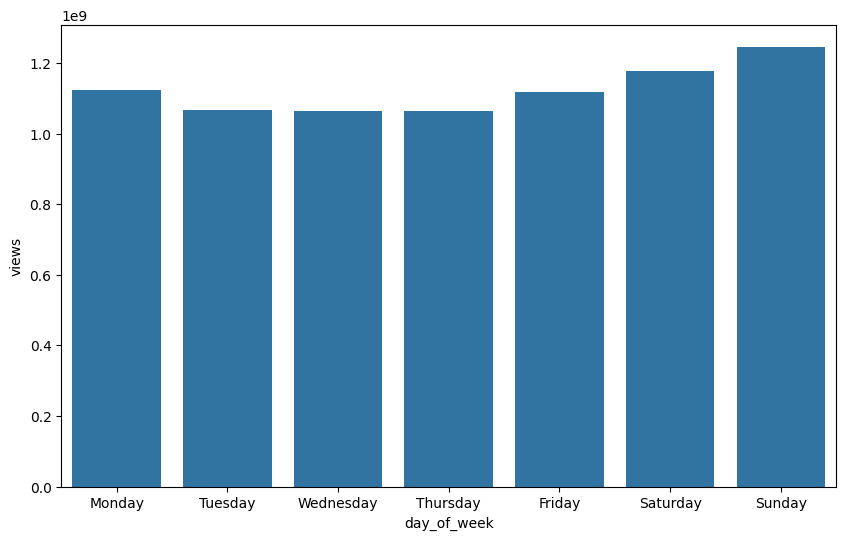

In [85]:
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='views', data=page_data_ja_by_day_of_week)
plt.show()